In [1]:
#We import the libraries we need.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#We now call the libraries we need for fits files that contain the image of our source.
from astropy.io import fits
from astropy.visualization import simple_norm
from astropy.visualization import LogStretch
from astropy.coordinates import SkyCoord
from matplotlib.colors import LogNorm

In [3]:
#We also import the following libraries to plot the coordinates in the Image.
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes

In [4]:
#We call the datafiles containing the images.
#POSS I: https://archive.stsci.edu/cgi-bin/dss_form
#ZTF: https://irsa.ipac.caltech.edu/applications/ztf/
file1 = '../../notebooks/toi2431-analysis/dss_search'
file2 = "../../notebooks/toi2431-analysis/ztf_20180912420058_000504_zg_c02_o_q4_sciimg_ra37.7637_dec8.3820_asec599.fits"

#The POSS I (Red) Image
with fits.open(file1) as hdul:
    image_data_1 = hdul[0].data
    header_1 = hdul[0].header

#The ZTF Image
with fits.open(file2) as hdul:
    image_data_2 = hdul[0].data
    header_2 = hdul[0].header

In [5]:
print(90 * "-")
print(f"Date of Observation for POSS I: {header_1['DATE-OBS']}")
print(90 * "-")
print(f"Date of Observation for ZTF: {header_2['CREATED']}")
print(90 * "-")

------------------------------------------------------------------------------------------
Date of Observation for POSS I: 1954-12-21T03:50:00
------------------------------------------------------------------------------------------
Date of Observation for ZTF: 2018-09-12T03:11:15
------------------------------------------------------------------------------------------


In [6]:
#We extract the WCS (World Coordinate System) Information from the header.
wcs1 = WCS(header_1)
wcs2 = WCS(header_2)

In [7]:
wcs1

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 37.910625 6.645138888888889 
CRPIX : -70.77484880328575 -3408.5631746583604 
PC1_1 PC1_2  : 0.025279802300671932 -0.00019822327040238777 
PC2_1 PC2_2  : 0.0002006091648894589 0.025287625561386272 
CDELT : -0.018679541707325033 0.018679541707325033 
NAXIS : 530  530

In [8]:
wcs2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 38.06124052291 8.424158881107 
CRPIX : -748.5 144.5 
CD1_1 CD1_2  : -0.0002812520063197 -7.412453822382e-07 
CD2_1 CD2_2  : 7.492726707431e-07 -0.0002813183644796 
NAXIS : 594  593

In [9]:
#We normalize the FITS image for better visibility
norm_1 = simple_norm(image_data_1, 'sqrt')
norm_2 = simple_norm(image_data_2, 'log', clip = True)

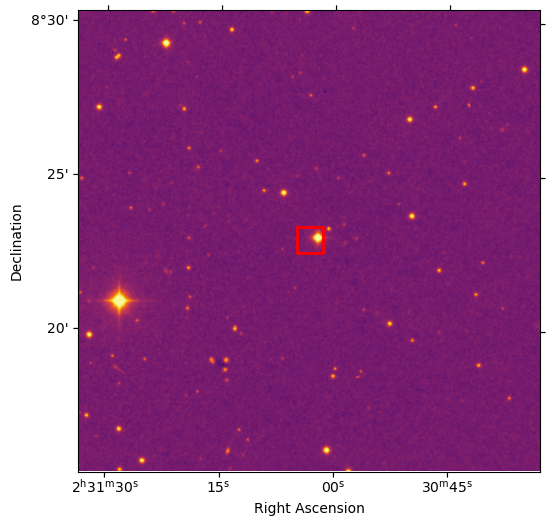

In [10]:
#We create the figure with the image.
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection = wcs1)
ax.imshow(image_data_1, cmap = "inferno", norm = norm_1)

#We also plot the coordinates.
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")

#We use TOI-2431's coordinates to plot its position.
#Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')

#We then transform coordinates to pixel coordinates in order to plot them on the image.
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)

ax.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

plt.show()

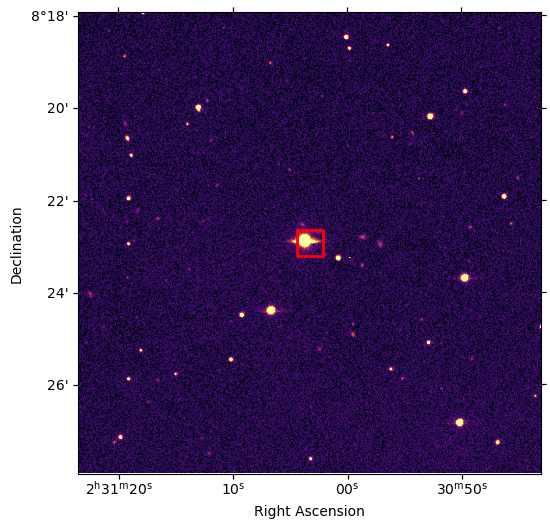

In [11]:
#We create the figure with the image.
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection = wcs2)
ax.imshow(image_data_2, cmap = "inferno", norm = LogNorm(vmin = np.percentile(image_data_2, 10),
                                                         vmax = np.percentile(image_data_2, 99.8)))

#We also plot the coordinates.
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")

#We use TOI-2431's coordinates to plot its position.
#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')

#We then transform coordinates to pixel coordinates in order to plot them on the image.
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)

ax.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

plt.show()

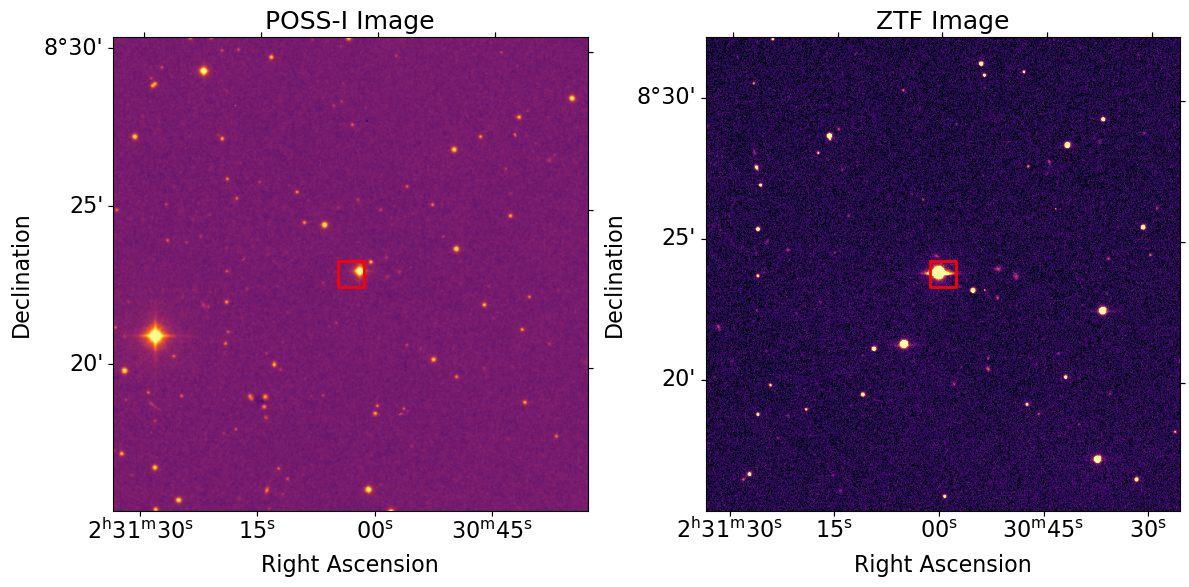

In [12]:
#We also create a panel-styled figure.
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': wcs1})

#The POSS I Image
ax1 = axes[0]
ax1.imshow(image_data_1, cmap="inferno", norm=norm_1)

ax1.set_xlabel("Right Ascension", fontsize = 16)
ax1.set_ylabel("Declination", fontsize = 16)
ax1.set_title("POSS-I Image", fontsize = 18)
ax1.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#The ZTF Image
ax2 = axes[1]
ax2.imshow(image_data_2, cmap = "inferno", norm = LogNorm(vmin = np.percentile(image_data_2, 10),
                                                          vmax = np.percentile(image_data_2, 99.8)))

ax2.set_xlabel("Right Ascension", fontsize = 16)
ax2.set_ylabel("Declination", fontsize = 16)
ax2.set_title("ZTF Image", fontsize = 18)
ax2.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

plt.tight_layout()
plt.show()

(array(264.98093829), array(265.01015374))
(array(296.84111257), array(295.69271023))


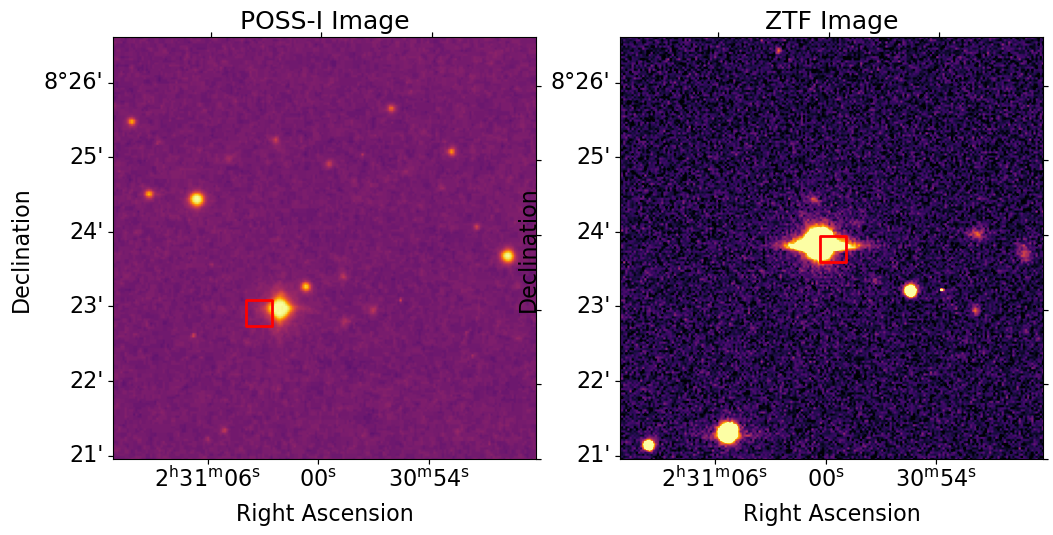

In [13]:
#We also create a panel-styled figure.
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': wcs1})

#The POSS I Image
ax1 = axes[0]
ax1.imshow(image_data_1, cmap="inferno", norm=norm_1)

ax1.set_xlabel("Right Ascension", fontsize = 16)
ax1.set_ylabel("Declination", fontsize = 16)
ax1.set_title("POSS-I Image", fontsize = 18)
ax1.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#The ZTF Image
ax2 = axes[1]
ax2.imshow(image_data_2, cmap = "inferno", norm = LogNorm(vmin = np.percentile(image_data_2, 10),
                                                          vmax = np.percentile(image_data_2, 99.8)))

ax2.set_xlabel("Right Ascension", fontsize = 16)
ax2.set_ylabel("Declination", fontsize = 16)
ax2.set_title("ZTF Image", fontsize = 18)
ax2.tick_params(axis = 'both', labelsize = 16)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)
print(pixel_coords_1)
print(pixel_coords_2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#We then define a zoomed area.
#Since the image is 593 x 593, we assume the center as 296, 296
x_center, y_center = 296, 296

#We also add the width of the zoomed area.
zoom_width = 200

#We set the new x and y limits according to the area we have defined.
ax1.set_xlim(x_center - zoom_width//2, x_center + zoom_width//2)
ax1.set_ylim(y_center - zoom_width//2, y_center + zoom_width//2)

ax2.set_xlim(x_center - zoom_width//2, x_center + zoom_width//2)
ax2.set_ylim(y_center - zoom_width//2, y_center + zoom_width//2)

#plt.tight_layout()
plt.show()

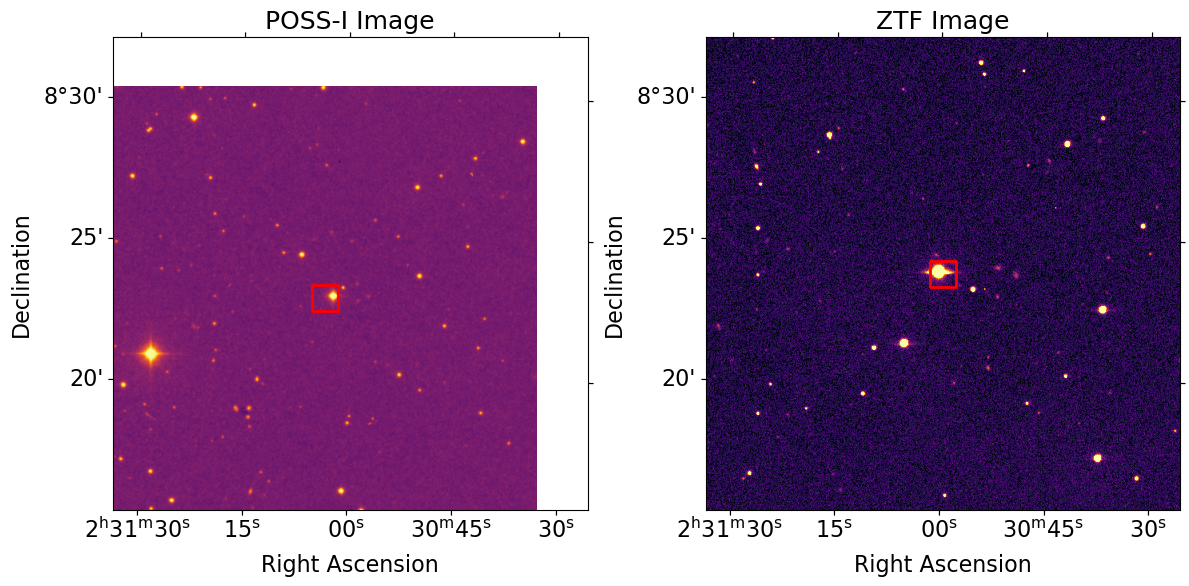

In [14]:
# We create a figure with shared y-axis between the two subplots.
fig, axes = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': wcs1}, sharey=True)

# The POSS I Image
ax1 = axes[0]
ax1.imshow(image_data_1, cmap="inferno", norm=norm_1)

ax1.set_xlabel("Right Ascension", fontsize=16)
ax1.set_ylabel("Declination", fontsize=16)
ax1.set_title("POSS-I Image", fontsize=18)
ax1.tick_params(axis='both', labelsize=16)

# Taken from SIMBAD => ICRS Coordinate
toi_coords_1 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_1 = wcs1.world_to_pixel(toi_coords_1)
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

# The ZTF Image
ax2 = axes[1]
ax2.imshow(image_data_2, cmap="inferno", norm=LogNorm(vmin=np.percentile(image_data_2, 10),
                                                      vmax=np.percentile(image_data_2, 99.8)))

ax2.set_xlabel("Right Ascension", fontsize=16)
ax2.set_ylabel("Declination", fontsize=16)
ax2.set_title("ZTF Image", fontsize=18)
ax2.tick_params(axis='both', labelsize=16)

# Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

# Set the same x and y limits for both axes
ax1.set_xlim(-0.5, 593.5)  # Use the max value from ax2's x-limits
ax1.set_ylim(-0.5, 592.5)  # Use the max value from ax2's y-limits

ax2.set_xlim(-0.5, 593.5)  # Make sure ax2 uses the same x-limits
ax2.set_ylim(-0.5, 592.5)  # Make sure ax2 uses the same y-limits

plt.tight_layout()
plt.show()


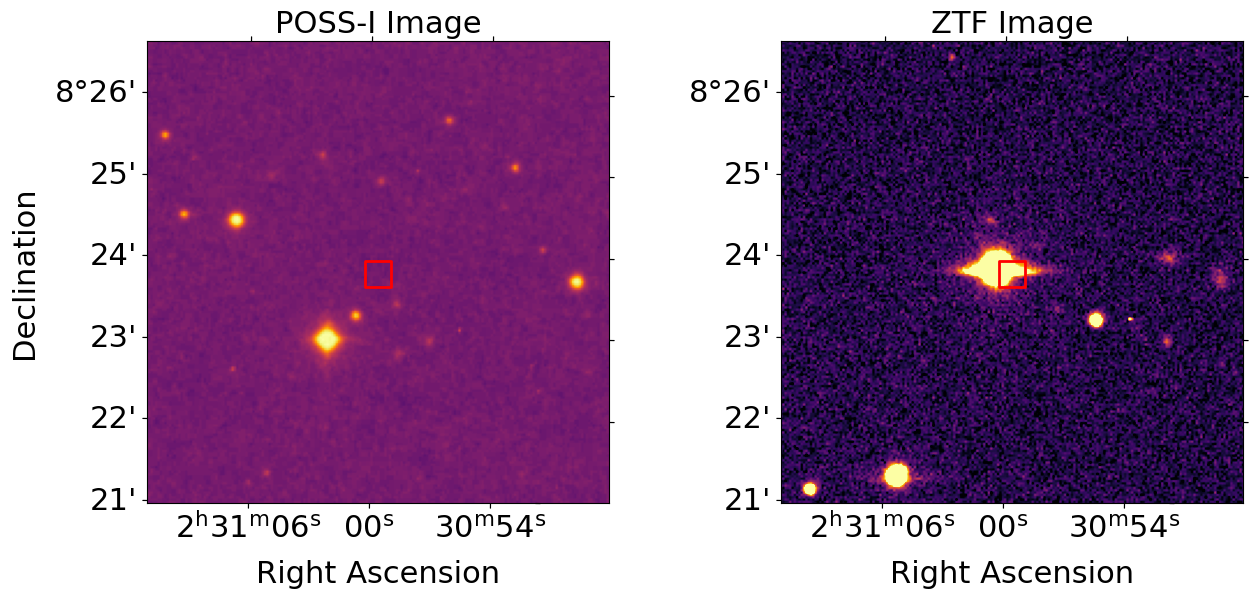

In [16]:
#We first set the limits of both images.
ax1.set_xlim(-0.5, 593.5)
ax1.set_ylim(-0.5, 592.5)

ax2.set_xlim(-0.5, 593.5)
ax2.set_ylim(-0.5, 592.5)

#We add the width of the zoomed area.
zoom_width = 200

#We then get the center of the ZTF image since it has more pixels than POSS-I.
#Our goal is to set the x-lim and y-lim of both images same.
center_x = (ax2.get_xlim()[1] - ax2.get_xlim()[0]) / 2
center_y = (ax2.get_ylim()[1] - ax2.get_ylim()[0]) / 2

#We then set limits to both images x and y axes according to the zoom width we have defined.
#Note that in here we zoom towards the center since the target is near the center of both images.
zoom_x_min = center_x - zoom_width / 2
zoom_x_max = center_x + zoom_width / 2
zoom_y_min = center_y - zoom_width / 2
zoom_y_max = center_y + zoom_width / 2

fig, axes = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'projection': wcs1})

#The POSS I Image
ax1 = axes[0]
ax1.imshow(image_data_1, cmap="inferno", norm=norm_1)

ax1.set_xlabel("Right Ascension", fontsize=22)
ax1.set_ylabel("Declination", fontsize=22)
ax1.set_title("POSS-I Image", fontsize=22)
ax1.tick_params(axis='both', labelsize=22)

#Taken from SIMBAD => ICRS Coordinate
#Note that we use wcs2 when converting to pixels because we want the square to be positioned at the same place
#for both images.
toi_coords_1 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_1 = wcs2.world_to_pixel(toi_coords_1)
ax1.scatter(pixel_coords_1[0], pixel_coords_1[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#The ZTF Image
ax2 = axes[1]
ax2.imshow(image_data_2, cmap="inferno", norm=LogNorm(vmin=np.percentile(image_data_2, 10),
                                                      vmax=np.percentile(image_data_2, 99.8)))

ax2.set_xlabel("Right Ascension", fontsize=22)
ax2.set_ylabel("Declination", fontsize=22, color = "white")
ax2.set_title("ZTF Image", fontsize=22)
ax2.tick_params(axis='both', labelsize=22)

#Taken from SIMBAD => ICRS Coordinate
toi_coords_2 = SkyCoord('2h31m03.28s +8d22m55.2s', frame='icrs')
pixel_coords_2 = wcs2.world_to_pixel(toi_coords_2)
ax2.scatter(pixel_coords_2[0], pixel_coords_2[1], marker='s', color='red', facecolor='none', s=350, lw=2)

#We then use the zoom area coordinates we have defined as our limits for both images.
#Note that the limits are the same for both images, hence the x and y axis are the same.
ax1.set_xlim(zoom_x_min, zoom_x_max)
ax1.set_ylim(zoom_y_min, zoom_y_max)

ax2.set_xlim(zoom_x_min, zoom_x_max)
ax2.set_ylim(zoom_y_min, zoom_y_max)

#plt.tight_layout()
plt.show()